**bold text**
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

# Load Data to Spark Cluster

In [8]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [9]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [10]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [11]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [12]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [13]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


In [14]:
#Task 2: Descriptive Statistics
# Calculate and display basic statistics for the "medv" column
statistics = spark.sql("SELECT AVG(medv) AS mean_medv, STDDEV(medv) AS std_medv, MIN(medv) AS min_medv, MAX(medv) AS max_medv FROM bostonh.bos_housing").collect()[0]
print("Statistics for medv:")
print("Mean:", statistics["mean_medv"])
print("Standard Deviation:", statistics["std_medv"])
print("Minimum:", statistics["min_medv"])
print("Maximum:", statistics["max_medv"])




Statistics for medv:
Mean: 22.532806324110698
Standard Deviation: 9.197104087379815
Minimum: 5.0
Maximum: 50.0


In [15]:
#Task 2: Descriptive Statistics
# Calculate and display the mean "rm" (average number of rooms per dwelling)
mean_rm = spark.sql("SELECT AVG(rm) AS mean_rm FROM bostonh.bos_housing").collect()[0]["mean_rm"]
print("Mean rm (average number of rooms per dwelling):", mean_rm)

Mean rm (average number of rooms per dwelling): 6.284634387351787


In [16]:
#Task 3: Data Exploration
# Identify the property with the highest crime rate ("crim") and provide details
highest_crim_property = spark.sql("SELECT * FROM bostonh.bos_housing WHERE crim = (SELECT MAX(crim) FROM bostonh.bos_housing)")
print("Property with the highest crime rate:")
highest_crim_property.show()


Property with the highest crime rate:
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [17]:
#Task 3: Data Exploration
# Find and report the property with the lowest median home value ("medv") and include its details
lowest_medv_property = spark.sql("SELECT * FROM bostonh.bos_housing WHERE medv = (SELECT MIN(medv) FROM bostonh.bos_housing)")
print("Property with the lowest median home value:")
lowest_medv_property.show()


Property with the lowest median home value:
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2| 396.9|30.59| 5.0|
|67.9208|0.0| 18.1|   0|0.693|5.683|100.0|1.4254| 24|666|   20.2|384.97|22.98| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+



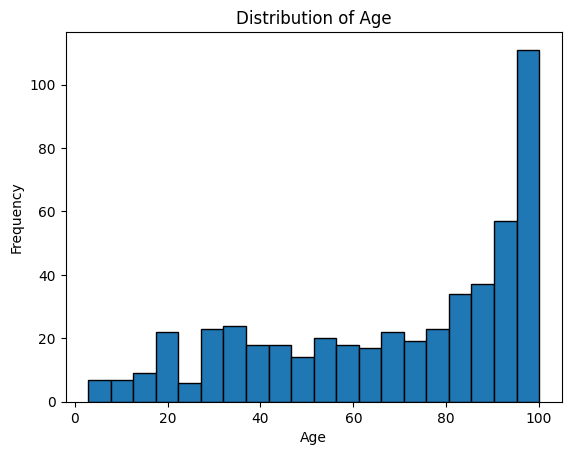

In [18]:
#Task 4: Data Distribution Analysis
#Create a histogram showing the distribution of the "age" column.
import matplotlib.pyplot as plt

# Retrieve the "age" column data
#age_data = spark.sql("SELECT age FROM bostonh.bos_housing").toPandas()
age_data = spark.sql("SELECT age FROM bostonh.bos_housing").rdd.flatMap(lambda x: x).collect()

# Create a histogram
plt.hist(age_data, bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


In [19]:
#Task 4: Data Distribution Analysis
# Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River)
percentage_of_properties_with_chas_value_of_1 = spark.sql("SELECT COUNT(*) AS num_properties_with_chas_value_of_1 FROM BostonH.bos_housing WHERE chas = 1").collect()[0]["num_properties_with_chas_value_of_1"] / total_records * 100
print("Percentage of properties with a chas value of 1:", percentage_of_properties_with_chas_value_of_1, "%")


Percentage of properties with a chas value of 1: 6.91699604743083 %


In [20]:
#Task 5: Correlation Analysis
# Calculate the correlation coefficient between "rm" and "medv"
correlation = dataset.stat.corr("rm", "medv")
print("Correlation between average number of rooms (rm) and median home value (medv):", correlation)

Correlation between average number of rooms (rm) and median home value (medv): 0.9898418300343826


In [22]:
# Calculate the correlation coefficient between "rm" and "medv"
corr_trial = """
SELECT
    CORR(rm, medv) AS correlation_rm_medv
FROM bostonh.bos_housing
"""

corr_rm_medv = spark.sql(corr_trial)
corr_rm_medv.show()

+-------------------+
|correlation_rm_medv|
+-------------------+
| 0.6953599470715401|
+-------------------+



In [23]:
#Task 5: Correlation Analysis
# Investigate if there is any correlation between "ptratio" and "nox"
correlation_ptratio_nox = dataset.stat.corr("ptratio", "nox")
print("Correlation between pupil-teacher ratio (ptratio) and nitrogen oxide concentration (nox):", correlation_ptratio_nox)

Correlation between pupil-teacher ratio (ptratio) and nitrogen oxide concentration (nox): -0.9863992223566027


In [24]:
# Investigate if there is any correlation between "ptratio" and "nox"
corr_trial_2 = """
SELECT
    CORR(ptratio, nox) AS correlation_ptratio_nox
FROM bostonh.bos_housing
"""

corr_ptratio_nox = spark.sql(corr_trial_2)
corr_ptratio_nox.show()

+-----------------------+
|correlation_ptratio_nox|
+-----------------------+
|    0.18893267711276893|
+-----------------------+



In [25]:
#Task 6: Advanced Querying
# Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv")
top_neighborhoods = spark.sql("SELECT * FROM bostonh.bos_housing ORDER BY medv DESC LIMIT 5")
print("The top 5 neighborhoods with the highest median home values (""medv"")")
top_neighborhoods.show()

The top 5 neighborhoods with the highest median home values (medv)
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [26]:
#Task 6: Advanced Querying
# Calculate and report the average property age for neighborhoods with "chas" value of 1 and 0
avg_age_chas1 = spark.sql("SELECT AVG(age) AS avg_age_chas1 FROM bostonh.bos_housing WHERE chas = 1").collect()[0]["avg_age_chas1"]
avg_age_chas0 = spark.sql("SELECT AVG(age) AS avg_age_chas0 FROM bostonh.bos_housing WHERE chas = 0").collect()[0]["avg_age_chas0"]
print("Average property age for neighborhoods with chas=1:", avg_age_chas1)
print("Average property age for neighborhoods with chas=0:", avg_age_chas0)

Average property age for neighborhoods with chas=1: 77.50000000000001
Average property age for neighborhoods with chas=0: 67.91167728237794


In [27]:
#Task 7: Visualization
# Create a Hive view named "property_age_view" that includes the "age" and "medv" columns
create_view_query = """
CREATE OR REPLACE VIEW property_age_view AS
SELECT age as AGE, medv as MEDV
FROM bostonh.bos_housing
"""
# Execute the query to create the view
spark.sql(create_view_query)

# Select data from the view
view_data = spark.sql("SELECT * FROM property_age_view LIMIT 5")
# Show the data
view_data.show()


+----+----+
| AGE|MEDV|
+----+----+
|65.2|24.0|
|78.9|21.6|
|61.1|34.7|
|45.8|33.4|
|54.2|36.2|
+----+----+



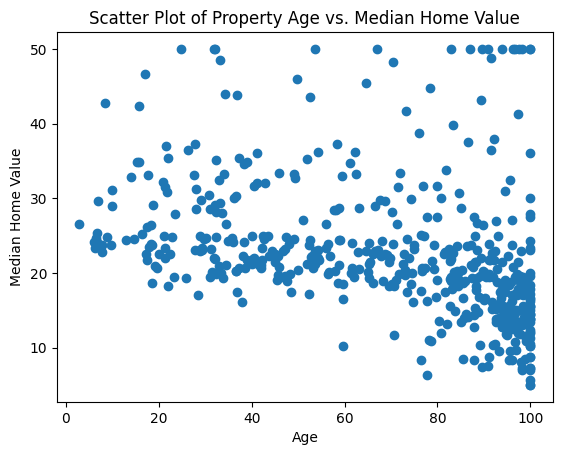

In [28]:
#Task 7: Visualization
#Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
# Retrieve the "age" and "medv" column data
data = spark.sql("SELECT age, medv FROM bostonh.bos_housing").toPandas()

# Create a scatter plot
plt.scatter(data['age'], data['medv'])
plt.xlabel('Age')
plt.ylabel('Median Home Value')
plt.title('Scatter Plot of Property Age vs. Median Home Value')
plt.show()


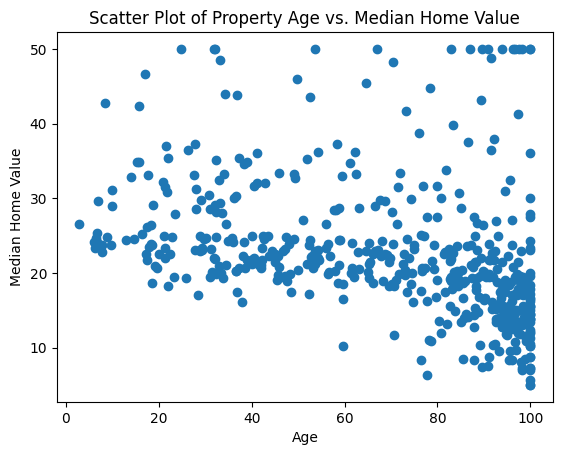

In [29]:
#Task 7: Visualization
#Plot a scatter plot of property age against median home value using a data visualization tool of your choice.
# Retrieve the "age" and "medv" column data as two lists
age_data = spark.sql("SELECT age FROM bostonh.bos_housing").rdd.flatMap(lambda x: x).collect()
medv_data = spark.sql("SELECT medv FROM bostonh.bos_housing").rdd.flatMap(lambda x: x).collect()

# Create a scatter plot
plt.scatter(age_data, medv_data)
plt.xlabel('Age')
plt.ylabel('Median Home Value')
plt.title('Scatter Plot of Property Age vs. Median Home Value')
plt.show()


In [30]:
# 8 Write a query to identify and report properties with "crim" value greater than 10 (potential outliers)
outliers = spark.sql("SELECT * FROM bostonh.bos_housing WHERE crim > 10")
print("Properties with a 'crim' value greater than 10 (potential outliers):")
outliers.show()


Properties with a 'crim' value greater than 10 (potential outliers):
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.874

In [31]:
from scipy.stats import pearsonr

#Null Hypothesis (H0): There is no statistically significant relationship between the average number of rooms (rm) and median home value (medv).

#Alternative Hypothesis (H1): There is a statistically significant relationship between the average number of rooms (rm) and median home value (medv).

# Select data from the view
view_data = spark.sql("SELECT rm, medv FROM BostonH.bos_housing")

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_data = view_data.toPandas()

# Calculate the correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(pandas_data['rm'], pandas_data['medv'])

# Display the results
print("Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)


Correlation Coefficient: 0.6953599470715394
P-Value: 2.4872288710080976e-74
